# Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Reading the dataset

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [3]:
df_train.head(2)

,Date,Weather,Year,Month,Hour,Holiday,Normalized_Temperature,Normalized_Feeling_Temperature,Normalized_Humidity,Windspeed,Count_of_Casual_Users,Count_of_Registered_Users,Count_of_Rented_Bikes
0,17/12/13,"Clear, Few clouds, Partly cloudy",2013,12,14,0,0.281667,0.269267,0.453371,0.363818,30,207,237
1,28/02/14,"Clear, Few clouds, Partly cloudy",2014,2,21,0,0.350000,0.353500,0.461124,0.110118,10,179,189


In [4]:
df_test.head(2)

,Date,Weather,Year,Month,Hour,Holiday,Normalized_Temperature,Normalized_Feeling_Temperature,Normalized_Humidity,Windspeed
0,08/08/14,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2014,8,14,0,0.80250,0.742956,0.522247,0.257071
1,27/07/14,"Clear, Few clouds, Partly cloudy",2014,7,20,0,0.78125,0.749067,0.593371,0.105624


# 2. Data Cleaning

In [5]:
def prepare_datetime(
    df: pd.DataFrame
):
    # Preparing the datetime column
    df["datetime"] = df["Date"] + " " + df["Hour"].astype(str) + ":00"
    # Changing the data type to datetime
    df["datetime"] = pd.to_datetime(df["datetime"], format="%d/%m/%y %H:%M")
    df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%y")

    return df

In [6]:
# Getting datetime column for train and test data
df_train = prepare_datetime(df_train)
df_test = prepare_datetime(df_test)

In [7]:
# Selecting a subset of columns
train_cols = ["Date", "datetime"] + ["Weather"] + df_train.columns.tolist()[5:-1]
test_cols = ["Date", "datetime"] + ["Weather"] + df_test.columns.tolist()[5:-1]

df_train_sub = df_train[train_cols]
df_test_sub = df_test[test_cols]

In [8]:
# Sorting the data by datetime
df_train_srtd = df_train_sub.sort_values(by=["datetime"]).reset_index(drop=True)
df_test_srtd = df_test_sub.sort_values(by=["datetime"]).reset_index(drop=True)

In [9]:
df_train_srtd.head()

,Date,datetime,Weather,Holiday,Normalized_Temperature,Normalized_Feeling_Temperature,Normalized_Humidity,Windspeed,Count_of_Casual_Users,Count_of_Registered_Users,Count_of_Rented_Bikes
0,2013-01-01,2013-01-01 00:00:00,"Clear, Few clouds, Partly cloudy",0,0.242083,0.297900,0.815618,0.000337,3,13,16
1,2013-01-01,2013-01-01 01:00:00,"Clear, Few clouds, Partly cloudy",0,0.222083,0.281589,0.807865,0.011236,8,32,40
2,2013-01-01,2013-01-01 03:00:00,"Clear, Few clouds, Partly cloudy",0,0.248750,0.288456,0.752247,0.010112,3,11,14
3,2013-01-01,2013-01-01 04:00:00,"Clear, Few clouds, Partly cloudy",0,0.246250,0.303456,0.758989,0.001124,0,2,2
4,2013-01-01,2013-01-01 05:00:00,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0,0.246250,0.265933,0.757865,0.098589,0,2,2


In [10]:
df_test_srtd.head()

,Date,datetime,Weather,Holiday,Normalized_Temperature,Normalized_Feeling_Temperature,Normalized_Humidity,Windspeed
0,2013-01-01,2013-01-01 02:00:00,"Clear, Few clouds, Partly cloudy",0,0.232500,0.280478,0.806742,0.011236
1,2013-01-01,2013-01-01 08:00:00,"Clear, Few clouds, Partly cloudy",0,0.246667,0.290122,0.751124,0.001124
2,2013-01-01,2013-01-01 14:00:00,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0,0.467083,0.468389,0.721124,0.284724
3,2013-01-01,2013-01-01 17:00:00,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0,0.443750,0.456067,0.826742,0.288094
4,2013-01-01,2013-01-01 18:00:00,"Light Snow, Light Rain + Thunderstorm + Scatte...",0,0.432083,0.436422,0.891236,0.262689


In [11]:
df_train_srtd["datetime"].min(), df_train_srtd["datetime"].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-31 22:00:00'))

In [12]:
df_test_srtd["datetime"].min(), df_test_srtd["datetime"].max()

(Timestamp('2013-01-01 02:00:00'), Timestamp('2014-12-31 23:00:00'))

## Observation

* The training data is available from Jan 1, 2013 - Dec 31, 2014 and it is at hourly granularity
* The missing intermediate timestamps belongs to test dataset

## Problem statement

We need to predict the number of bikes rented in the timestamps available in the test data

# 3. Descriptive analysis

## 3.1 Dataset shape

In [13]:
print(f"There are {df_train_srtd.shape[0]} rows in train data")
print(f"There are {df_test_srtd.shape[0]} rows in test data")

There are 12165 rows in train data
There are 5214 rows in test data


## 3.2 Validating dtypes

In [14]:
df_train_srtd.dtypes

Date                              datetime64[ns]
datetime                          datetime64[ns]
Weather                                   object
Holiday                                    int64
Normalized_Temperature                   float64
Normalized_Feeling_Temperature           float64
Normalized_Humidity                      float64
Windspeed                                float64
Count_of_Casual_Users                      int64
Count_of_Registered_Users                  int64
Count_of_Rented_Bikes                      int64
dtype: object

In [15]:
df_test_srtd.dtypes

Date                              datetime64[ns]
datetime                          datetime64[ns]
Weather                                   object
Holiday                                    int64
Normalized_Temperature                   float64
Normalized_Feeling_Temperature           float64
Normalized_Humidity                      float64
Windspeed                                float64
dtype: object

## 3.3 Checking for missing values

In [16]:
df_train_srtd.isna().sum()

Date                              0
datetime                          0
Weather                           0
Holiday                           0
Normalized_Temperature            0
Normalized_Feeling_Temperature    0
Normalized_Humidity               0
Windspeed                         0
Count_of_Casual_Users             0
Count_of_Registered_Users         0
Count_of_Rented_Bikes             0
dtype: int64

In [17]:
df_test_srtd.isna().sum()

Date                              0
datetime                          0
Weather                           0
Holiday                           0
Normalized_Temperature            0
Normalized_Feeling_Temperature    0
Normalized_Humidity               0
Windspeed                         0
dtype: int64

## 3.4 Distribution of values

In [18]:
# Count of different weather conditions
df_train_srtd["Weather"].value_counts()

Weather
Clear, Few clouds, Partly cloudy                                                           8032
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               3140
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     990
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                    3
Name: count, dtype: int64

In [19]:
# Dates representing holiday
df_train_srtd.loc[df_train_srtd["Holiday"]==1, "Date"].unique()

<DatetimeArray>
['2013-01-17 00:00:00', '2013-02-21 00:00:00', '2013-04-15 00:00:00',
 '2013-05-30 00:00:00', '2013-07-04 00:00:00', '2013-09-05 00:00:00',
 '2013-10-10 00:00:00', '2013-11-11 00:00:00', '2013-11-24 00:00:00',
 '2013-12-26 00:00:00', '2014-01-02 00:00:00', '2014-01-16 00:00:00',
 '2014-02-20 00:00:00', '2014-04-16 00:00:00', '2014-05-28 00:00:00',
 '2014-07-04 00:00:00', '2014-09-03 00:00:00', '2014-10-08 00:00:00',
 '2014-11-12 00:00:00', '2014-11-22 00:00:00', '2014-12-25 00:00:00']
Length: 21, dtype: datetime64[ns]

## 3.4 Summarizing the train dataset

In [20]:
df_train_srtd.describe()

,Date,datetime,Holiday,Normalized_Temperature,Normalized_Feeling_Temperature,Normalized_Humidity,Windspeed,Count_of_Casual_Users,Count_of_Registered_Users,Count_of_Rented_Bikes
count,12165,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2014-01-02 01:48:54.155363840,2014-01-02 13:19:05.252774400,0.028442,0.502845,0.483966,0.632797,0.195148,35.304644,154.582244,189.886889
min,2013-01-01 00:00:00,2013-01-01 00:00:00,0.000000,0.023333,0.003333,0.001124,0.000000,0.000000,0.000000,1.000000
25%,2013-07-05 00:00:00,2013-07-05 10:00:00,0.000000,0.344583,0.338300,0.481236,0.110118,4.000000,35.000000,41.000000
50%,2014-01-02 00:00:00,2014-01-02 16:00:00,0.000000,0.508333,0.494800,0.634494,0.194000,17.000000,116.000000,144.000000
75%,2014-07-01 00:00:00,2014-07-01 05:00:00,0.000000,0.660833,0.627311,0.788989,0.263812,48.000000,221.000000,282.000000
max,2014-12-31 00:00:00,2014-12-31 22:00:00,1.000000,1.002083,1.003333,1.011236,0.854071,367.000000,886.000000,977.000000
std,NaN,NaN,0.166239,0.192616,0.172008,0.192051,0.122673,48.787590,151.463431,180.770096


## 3.5 Correlation between features

In [21]:
def get_nmrcl_cols(
    df: pd.DataFrame
):
    nmrcl_cols = [col for col in df.columns if df[col].dtype not in ["object", "datetime64[ns]"]]

    return nmrcl_cols

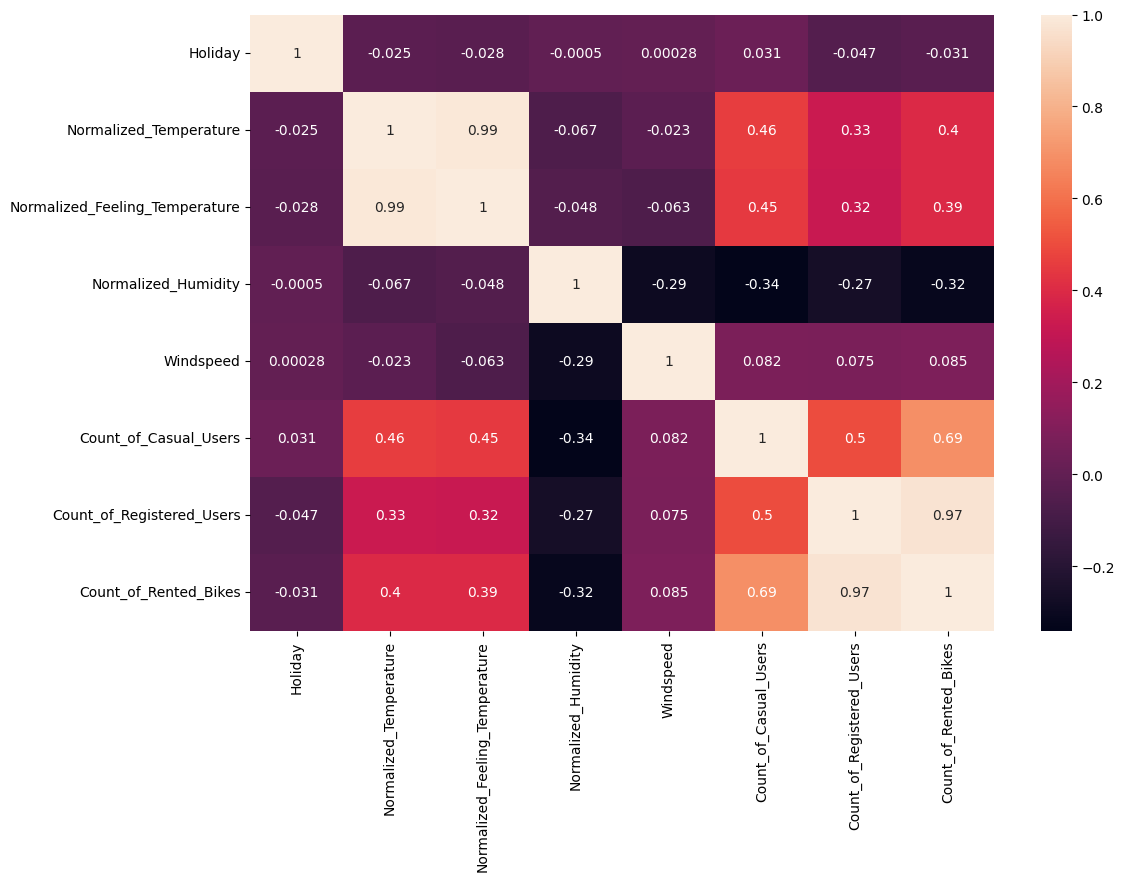

In [22]:
numerical_cols = get_nmrcl_cols(df_train_srtd)

plt.figure(figsize=(12, 8))
sns.heatmap(df_train_srtd[numerical_cols].corr(), annot=True)
plt.show()